In [73]:
import pandas as pd
import json
from pathlib import Path

RACES = [
  "NH_BLACK",
  "NH_WHITE",
  "HISP",
  "NH_ASIAN",
  "NH_OTHER",
]

In [74]:

def summarize_election(
  election_path
):
  clean_stem = election_path.stem.replace("current_wards", "current-wards")
  back_half = clean_stem.split("samples_100")[1]
  _, plan, district, __, cohesion, alpha = back_half.split("_")
  seat_count = clean_stem.split("seats_")[-1].split("_")[0]
  counts = {}
  with open(election_path, "r") as f:
    for line in f:
      election = json.loads(line)
      winners = election["winners"]
      for _winner in winners:
        winner = "_".join(_winner.split("_")[:-1])
        if winner not in counts:
          counts[winner] = 0
        counts[winner] += 1
  # divide each by number of runs
  for winner in counts:
    counts[winner] = counts[winner] / 100
  for race in RACES:
    if race not in counts:
      counts[race] = 0
  return {
    "plan": plan,
    "district": district,
    "seat_count": seat_count,
    "cohesion": cohesion,
    "alpha": alpha,
    **counts,
  }


In [83]:
DATA_DIR = Path("../data")
PLAN_DIR = DATA_DIR / "plan_results"

In [96]:
# 10x5
seats5_results = [
  # this ended up split into two folders oops!
  *[
    z for z in PLAN_DIR.glob("stv_slate_pl_voters_1000_seats_5_samples_100_*.jsonl")
  ],
  *[
    z for z in Path(PLAN_DIR / 'set2').glob("stv_slate_pl_voters_1000_seats_5_samples_100_*.jsonl")
  ]
]
# 10x3
seats3_results = [z for z in PLAN_DIR.glob("stv_slate_pl_voters_1000_seats_3_samples_100_*.jsonl")]
# 50x1
single_member_results = [z for z in PLAN_DIR.glob("plurality_slate_pl_voters_1000_seats_1_samples_100_*.jsonl")]

In [128]:
output = []
for result_file in single_member_results:
  output.append(summarize_election(result_file))
for result_file in seats3_results:
  output.append(summarize_election(result_file))
for result_file in seats5_results:
  output.append(summarize_election(result_file))
df = pd.DataFrame(output)
df.head()

,plan,district,seat_count,cohesion,alpha,HISP,NH_WHITE,NH_BLACK,NH_ASIAN,NH_OTHER
0,prec50-12816,13.0,1,0.6,0.5,0.78,0.22,0.0,0.0,0.0
1,prec50-12816,33.0,1,0.6,1,0.00,0.00,1.0,0.0,0.0
2,prec50-55139,35.0,1,0.9,1,0.00,0.00,1.0,0.0,0.0
3,prec50-4287,26.0,1,0.6,0.5,0.00,0.00,1.0,0.0,0.0
4,current-wards,44.0,1,0.6,0.5,0.00,1.00,0.0,0.0,0.0


In [124]:
TOTAL_COUNT = 50
agg = df.drop(columns=["district", "seat_count"])\
    .groupby([
    "plan",
    "cohesion",
    "alpha",
  ])\
  .sum().reset_index()
agg['PCT_NH_BLACK'] = agg['NH_BLACK'] / TOTAL_COUNT
agg['PCT_NH_WHITE'] = agg['NH_WHITE'] / TOTAL_COUNT
agg['PCT_HISP'] = agg['HISP'] / TOTAL_COUNT
agg['PCT_NH_ASIAN'] = agg['NH_ASIAN'] / TOTAL_COUNT
agg['PCT_NH_OTHER'] = agg['NH_OTHER'] / TOTAL_COUNT

<Axes: >

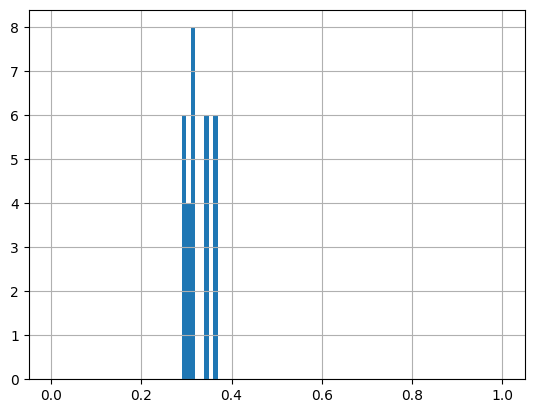

In [125]:
agg.PCT_NH_BLACK.hist(range=(0, 1), bins=100)

<Axes: >

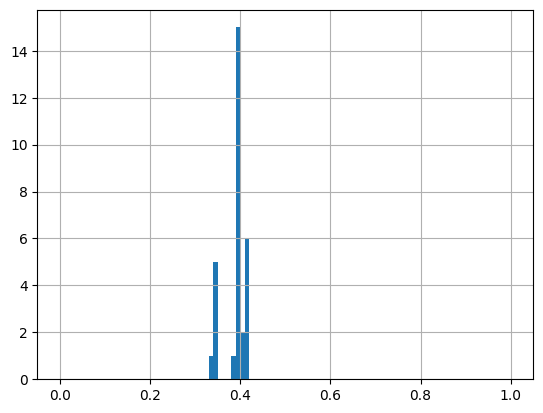

In [126]:
agg.PCT_NH_WHITE.hist(range=(0, 1), bins=100)

<Axes: >

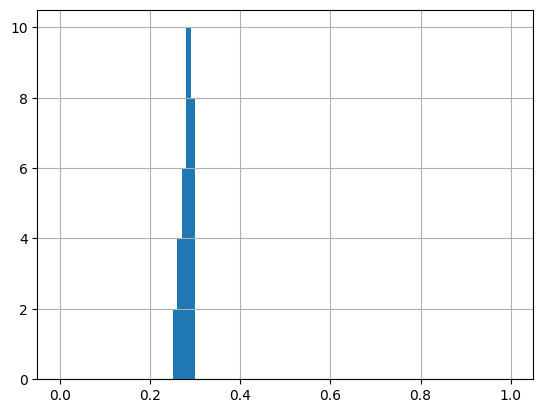

In [127]:
agg.PCT_HISP.hist(range=(0, 1), bins=100)

In [121]:
print("MAX HISP", agg['PCT_HISP'].max())
print("MAX NH_BLACK", agg['PCT_NH_BLACK'].max())
print("MAX NH_WHITE", agg['PCT_NH_WHITE'].max())
print("MAX NH_ASIAN", agg['PCT_NH_ASIAN'].max())
print("MAX NH_OTHER", agg['PCT_NH_OTHER'].max())
print("")
print("MIN HISP", agg['PCT_HISP'].min())
print("MIN NH_BLACK", agg['PCT_NH_BLACK'].min())
print("MIN NH_WHITE", agg['PCT_NH_WHITE'].min())
print("MIN NH_ASIAN", agg['PCT_NH_ASIAN'].min())
print("MIN NH_OTHER", agg['PCT_NH_OTHER'].min())
print("")
print("MEAN HISP", agg['PCT_HISP'].mean())
print("MEAN NH_BLACK", agg['PCT_NH_BLACK'].mean())
print("MEAN NH_WHITE", agg['PCT_NH_WHITE'].mean())
print("MEAN NH_ASIAN", agg['PCT_NH_ASIAN'].mean())
print("MEAN NH_OTHER", agg['PCT_NH_OTHER'].mean())

MAX HISP 0.33766666666666667
MAX NH_BLACK 0.378
MAX NH_WHITE 0.383
MAX NH_ASIAN 0.03966666666666666
MAX NH_OTHER 0.011000000000000001

MIN HISP 0.2796666666666667
MIN NH_BLACK 0.3
MIN NH_WHITE 0.304
MIN NH_ASIAN 0.0
MIN NH_OTHER 0.0

MEAN HISP 0.3103111111111111
MEAN NH_BLACK 0.33116666666666666
MEAN NH_WHITE 0.34260370370370374
MEAN NH_ASIAN 0.013255555555555553
MEAN NH_OTHER 0.001822222222222222
